# Install dependencies and setup environment

In [3]:
!pip install -Uqq fastbook
!pip install -r requirements.txt
import fastbook
fastbook.setup_book()

from fastbook import *

# Unzip .wav files

In [4]:
import zipfile
with zipfile.ZipFile('datasets/sirens.zip', 'r') as zip_ref:
    zip_ref.extractall('datasets/sirens')

# Install librosa
Handle audio

In [6]:
!pip install librosa

import matplotlib.pyplot as plt
import librosa.display

import numpy as np
import pandas as pd
import librosa

# Create spectrograms
Waveforms may not be the right option as it represents amplitude as a function of time while spectrograms represent frequencies as a function of time.

In [30]:
def create_spectrogram(filename):
    y, sr = librosa.load(filename)

    window_size = 1024
    window = np.hanning(window_size)
    stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
    out = 2 * np.abs(stft) / np.sum(window)

    # For plotting headlessly
    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

    fig = plt.Figure()
    plt.axis('off')
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
    return fig

# For the given path, get the List of all files in the directory tree

In [13]:
import os

def get_list_of_files(dirName):    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + get_list_of_files(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

Generating spectrogram for datasets/sirens/sounds/ambulance/sound_1.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_10.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_100.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_101.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_102.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_103.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_104.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_105.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_106.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_107.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_108.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_109.wav
Generating spectrogram for datasets/sirens/sounds/ambulance/sound_11.wav
Generating spectrogram for datasets/sirens

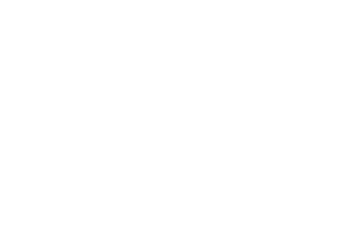

In [32]:
import os

all_files = get_list_of_files('datasets/sirens/sounds')

for filename in all_files:
    if filename.endswith(".wav"): 
         print("Generating spectrogram for " + filename)
         save_file_name = filename.split('/')[-2] + '/' + filename.split('/')[-1].split('.')[0]+".png"
         create_spectrogram(filename).savefig('datasets/sirens/spectro/' + save_file_name, bbox_inches='tight')
         


# Prepare a list of spectrogram files and display samples